In [110]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'C:\Users\Rajan Kumar\Desktop\Data Analyst Course\ALEX The Analyst\Python\movies.csv\movies.csv')


In [39]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [40]:
# Check for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [41]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [115]:
# Change data type of Budget, and Gross to integer

df = df.fillna(0) # For columns with NaN as value replace it with 0 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [136]:
df.head()

,budget,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,company,runtime,year_correct
5445,237000000,2847246203,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2254,162.0,2009.0
7445,356000000,2797501328,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,1607,181.0,2019.0
3045,200000000,2201647264,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2254,194.0,1997.0
6663,245000000,2069521700,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,1541,138.0,2015.0
7244,321000000,2048359754,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,1607,149.0,2018.0


In [52]:
df.released[:10] 

0        June 13, 1980 (United States)
1         July 2, 1980 (United States)
2        June 20, 1980 (United States)
3         July 2, 1980 (United States)
4        July 25, 1980 (United States)
5          May 9, 1980 (United States)
6        June 20, 1980 (United States)
7    December 19, 1980 (United States)
8        June 19, 1981 (United States)
9         May 16, 1980 (United States)
Name: released, dtype: object

In [53]:
type(df.released[0])

str

In [112]:
df["date_correct"] = pd.to_datetime(df['released'].str.split(' \(').str[0])

#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year_correct'] = pd.DatetimeIndex(df['date_correct']).year

del df['date_correct']

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980.0


In [137]:
df.head()

,budget,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,company,runtime,year_correct
5445,237000000,2847246203,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2254,162.0,2009.0
7445,356000000,2797501328,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,1607,181.0,2019.0
3045,200000000,2201647264,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2254,194.0,1997.0
6663,245000000,2069521700,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,1541,138.0,2015.0
7244,321000000,2048359754,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,1607,149.0,2018.0


In [113]:
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)

In [70]:
# Show all data

pd.set_option('display.max_rows', None)

In [143]:
# Drop any duplicates

df['company'] = df['company'].astype('str') # Convert to string

df['company'].drop_duplicates().sort_values(ascending=False).head()

2098    999
2225    998
1054    997
90      996
4636    995
Name: company, dtype: object

In [138]:
df.head()

,budget,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,company,runtime,year_correct
5445,237000000,2847246203,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2254,162.0,2009.0
7445,356000000,2797501328,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,1607,181.0,2019.0
3045,200000000,2201647264,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2254,194.0,1997.0
6663,245000000,2069521700,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,1541,138.0,2015.0
7244,321000000,2048359754,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,1607,149.0,2018.0


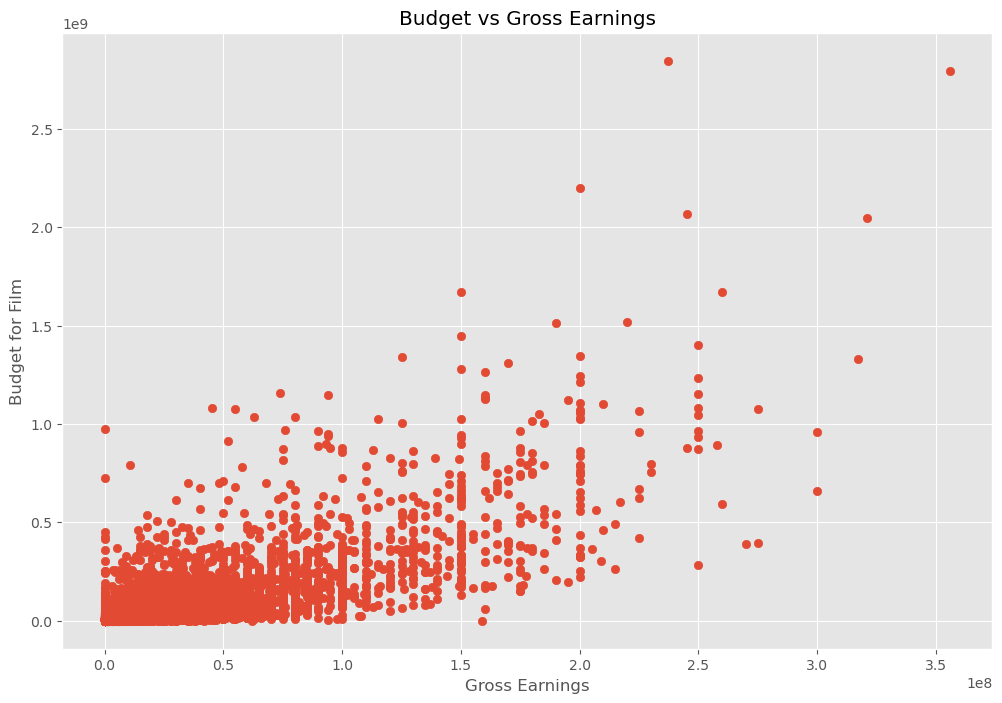

In [92]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [91]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

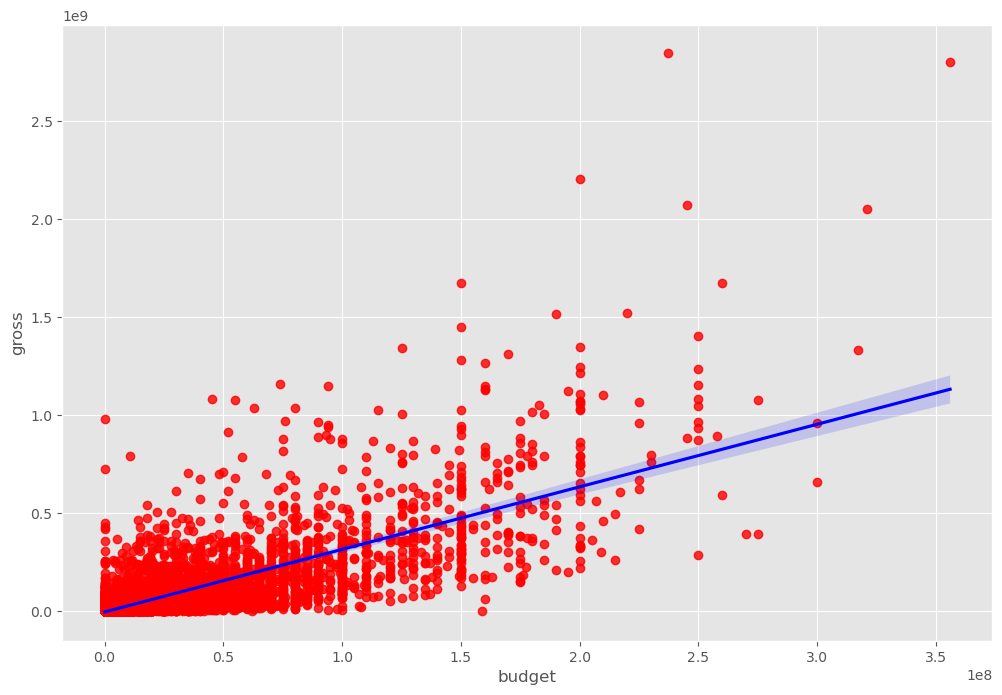

In [94]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [ ]:
# Find ing the Correlation

In [103]:
df.corr(method = 'pearson') #pearson(default), kendall, spearman

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.997415
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.100597
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.217921
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.300066
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.255026
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.118017
year_correct,0.997415,0.100597,0.217921,0.300066,0.255026,0.118017,1.000000


In [ ]:
# High Correlation between budget and gross

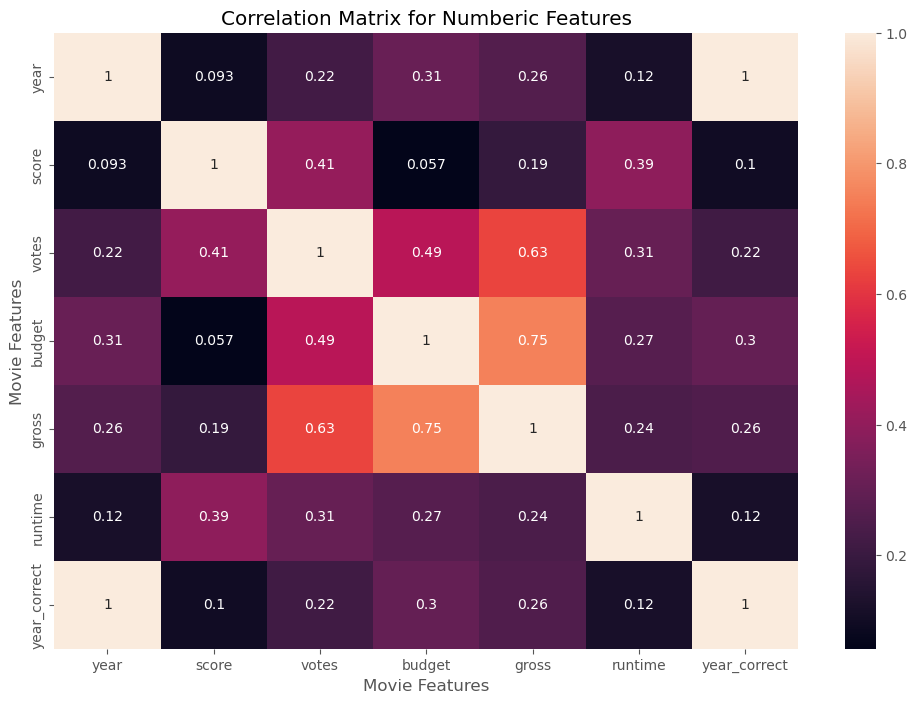

In [105]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numberic Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [106]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018.0


In [142]:
df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,company,runtime,year_correct
5445,237000000,2847246203,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2254,162.0,2009.0
7445,356000000,2797501328,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,1607,181.0,2019.0
3045,200000000,2201647264,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2254,194.0,1997.0
6663,245000000,2069521700,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,1541,138.0,2015.0
7244,321000000,2048359754,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,1607,149.0,2018.0


In [141]:
df.head()

,budget,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,company,runtime,year_correct
5445,237000000,2847246203,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2254,162.0,2009.0
7445,356000000,2797501328,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,1607,181.0,2019.0
3045,200000000,2201647264,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2254,194.0,1997.0
6663,245000000,2069521700,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,1541,138.0,2015.0
7244,321000000,2048359754,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,1607,149.0,2018.0


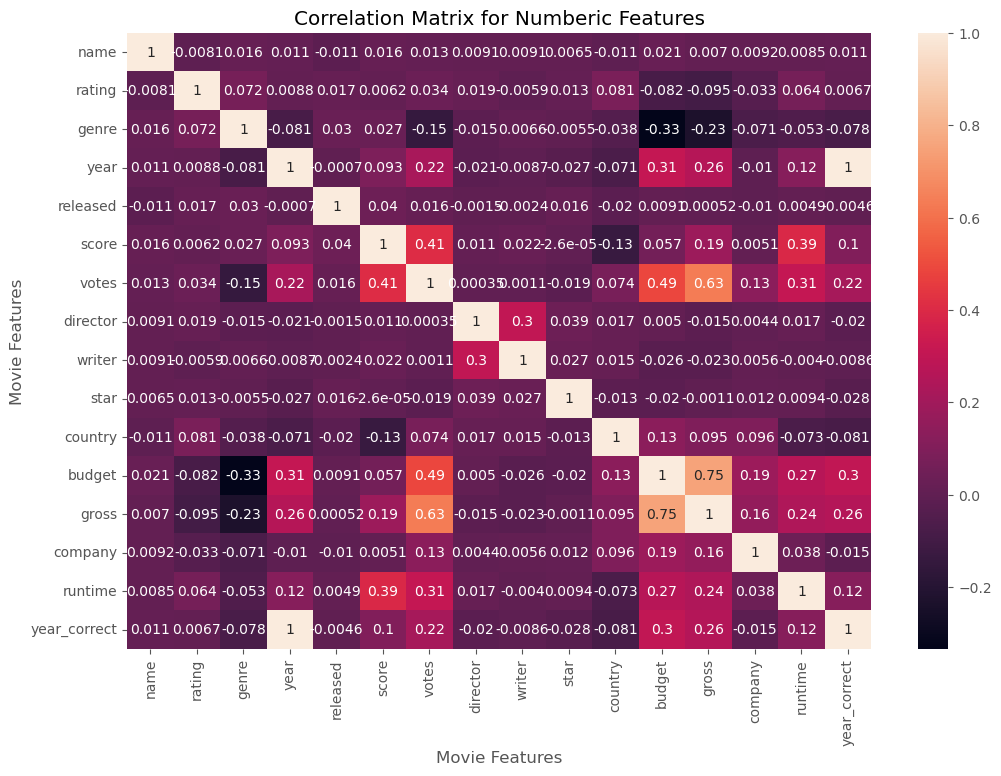

In [117]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numberic Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [121]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime,year_correct
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2847246203,2254,162.0,2009.0
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,2797501328,1607,181.0,2019.0
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2201647264,2254,194.0,1997.0
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,2069521700,1541,138.0,2015.0
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,2048359754,1607,149.0,2018.0


In [126]:
df_numerized.budget[:10]

5445    237000000
7445    356000000
3045    200000000
6663    245000000
7244    321000000
7480    260000000
6653    150000000
6043    220000000
6646    190000000
7494    150000000
Name: budget, dtype: int64

In [127]:
col_budget = df_numerized.pop('budget')
df.insert(0, 'budget', col_budget)

In [128]:
df_numerized.head()

,budget,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime,year_correct
5445,237000000,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2847246203,2254,162.0,2009.0
7445,356000000,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,2797501328,1607,181.0,2019.0
3045,200000000,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2201647264,2254,194.0,1997.0
6663,245000000,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,2069521700,1541,138.0,2015.0
7244,321000000,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,2048359754,1607,149.0,2018.0


In [129]:
col_gross = df_numerized.pop('gross')
df.insert(1, 'gross', col_gross)

In [130]:
df_numerized.head()

,budget,gross,name,rating,genre,year,released,score,votes,director,writer,star,country,company,runtime,year_correct
5445,237000000,2847246203,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,2254,162.0,2009.0
7445,356000000,2797501328,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,1607,181.0,2019.0
3045,200000000,2201647264,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,2254,194.0,1997.0
6663,245000000,2069521700,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,1541,138.0,2015.0
7244,321000000,2048359754,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,1607,149.0,2018.0


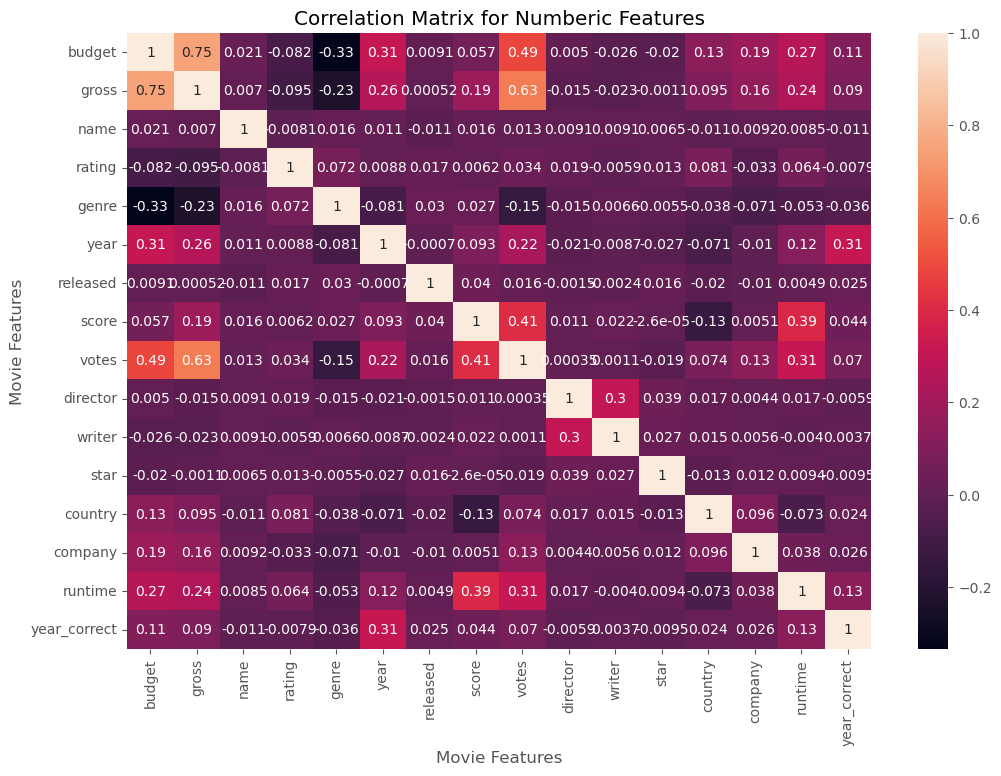

In [131]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numberic Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [140]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

In [139]:
sorted_pairs = corr_pairs.sort_values()


In [135]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.632870
gross         votes           0.632870
budget        gross           0.750157
gross         budget          0.750157
budget        budget          1.000000
company       company         1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings

# Company has low correlation